# **Names : Rayhan Shah, Zarmeen**

# **Submission : Updated Homework Team 63**

## **Part A: Predicting Listening Behavior on a Music Streaming Platform**

**Initial Code for both part A & B**

In [2]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = 'listens.p'
X, y = pickle.load(open(file_path, 'rb'))

**A1**

In [18]:
# (a)
num_users = X.shape[0]
num_songs = X.shape[1]

# (b)
max_listens = np.max(X)

# (c)
percentage_users_listened = (np.sum(y) / y.shape[0]) * 100

# (d)
total_listens_per_song = np.sum(X, axis=0)
min_listens_per_song = np.min(total_listens_per_song)
max_listens_per_song = np.max(total_listens_per_song)
avg_listens_per_song = np.mean(total_listens_per_song)

# (e)
users_per_song = np.sum(X > 0, axis=0)
min_users_per_song = np.min(users_per_song)
max_users_per_song = np.max(users_per_song)
avg_users_per_song = np.mean(users_per_song)

# (f)
total_listens_per_user = np.sum(X, axis=1)
min_listens_per_user = np.min(total_listens_per_user)
max_listens_per_user = np.max(total_listens_per_user)
avg_listens_per_user = np.mean(total_listens_per_user)

# (g)
songs_per_user = np.sum(X > 0, axis=1)
min_songs_per_user = np.min(songs_per_user)
max_songs_per_user = np.max(songs_per_user)
avg_songs_per_user = np.mean(songs_per_user)

# Organize
exploration_summary = {
    "Number of Users": num_users,
    "Number of Songs": num_songs,
    "The maximum number of times that a user has listened to one song": max_listens,
    "Percentage of Users Listened": percentage_users_listened,
    "Song Listens (Total)": {
        "Min": min_listens_per_song,
        "Max": max_listens_per_song,
        "Average": avg_listens_per_song,
    },
    "Users per Song": {
        "Min": min_users_per_song,
        "Max": max_users_per_song,
        "Average": avg_users_per_song,
    },
    "User Listens (Total)": {
        "Min": min_listens_per_user,
        "Max": max_listens_per_user,
        "Average": avg_listens_per_user,
    },
    "Songs per User": {
        "Min": min_songs_per_user,
        "Max": max_songs_per_user,
        "Average": avg_songs_per_user,
    },
}

# Results
for key, value in exploration_summary.items():
    print(f"{key}: {value}")

Number of Users: 1960
Number of Songs: 990
The maximum number of times that a user has listened to one song: 214.0
Percentage of Users Listened: 16.3265306122449
Song Listens (Total): {'Min': 6.0, 'Max': 688.0, 'Average': 61.607070707070704}
Users per Song: {'Min': 6, 'Max': 340, 'Average': 32.07878787878788}
User Listens (Total): {'Min': 2.0, 'Max': 293.0, 'Average': 31.117857142857144}
Songs per User: {'Min': 2, 'Max': 138, 'Average': 16.203061224489797}


**A2**

In [27]:
# Split
X_train, X_test = X[:1400], X[1400:]
y_train, y_test = y[:1400], y[1400:]

# (a)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_preds)
print(f"Random Forest Test Set AUC: {rf_auc:.4f}")

# (b)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_params = {'n_neighbors': [1, 2, 4, 8, 16, 32, 40], 'metric': ['euclidean', 'manhattan' , 'hamming']}
knn_search = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='roc_auc', cv=5)
knn_search.fit(X_train_scaled, y_train)

best_knn_params = knn_search.best_params_
best_knn_model = knn_search.best_estimator_
knn_preds = best_knn_model.predict_proba(X_test_scaled)[:, 1]
knn_auc = roc_auc_score(y_test, knn_preds)

print(f"Best parameters for k-NN: {best_knn_params}")
print(f"AUC for k-NN Test Set: {knn_auc:.4f}")

Random Forest Test Set AUC: 0.8029
Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 40}
AUC for k-NN Test Set: 0.7347


**A3**

In [22]:
# Split
X_train, X_test = X[:1400], X[1400:]
y_train, y_test = y[:1400], y[1400:]

# Initialize
column_scaler = StandardScaler()

# Apply
X_train_normalized = column_scaler.fit_transform(X_train)
X_test_normalized = column_scaler.transform(X_test)

# Perform
knn_hyperparameters = {
    'n_neighbors': [1, 2, 4, 8, 16, 32, 40],
    'metric': ['euclidean', 'manhattan', 'hamming']
}
knn_grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_hyperparameters,
    scoring='roc_auc',
    cv=5
)
knn_grid_search.fit(X_train_normalized, y_train)

# Extract
optimal_knn_params = knn_grid_search.best_params_
optimal_knn_model = knn_grid_search.best_estimator_

# Predict
normalized_knn_predictions = optimal_knn_model.predict_proba(X_test_normalized)[:, 1]

# Calculate
normalized_knn_auc = roc_auc_score(y_test, normalized_knn_predictions)

# Results
print(f"Best parameters for Column Normalization: {optimal_knn_params}")
print(f"AUC Column Normalization: {normalized_knn_auc:.4f}")

Best parameters for Column Normalization: {'metric': 'manhattan', 'n_neighbors': 40}
AUC Column Normalization: 0.7347


**A4**

In [28]:
# Split
X_train, X_test = X[:1400], X[1400:]
y_train, y_test = y[:1400], y[1400:]

# Create
pipeline = Pipeline([
    ('scaler_step', StandardScaler()),
    ('pca_step', PCA()),
    ('knn_step', KNeighborsClassifier())
])

# Define
param_grid = {
    'knn_step__n_neighbors': [1, 2, 4, 8, 16, 32, 40],
    'pca_step__n_components': [5, 10, 20, 50, 100],
    'knn_step__metric': ['euclidean', 'manhattan', 'hamming']
}

# Perform
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)
grid_search.fit(X_train, y_train)

# Extract
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions
pca_knn_predictions = best_model.predict_proba(X_test)[:, 1]

# Calculate
pca_knn_auc = roc_auc_score(y_test, pca_knn_predictions)

# Results
print(f"Best parameters: {best_params}")
print(f"AUC for PCA & k-NN: {pca_knn_auc:.4f}")

Best parameters: {'knn_step__metric': 'manhattan', 'knn_step__n_neighbors': 40, 'pca_step__n_components': 5}
AUC for PCA & k-NN: 0.7170


**A5**

In [29]:
# Split
X_train, X_test = X[:1400], X[1400:]
y_train, y_test = y[:1400], y[1400:]

# Create
pipeline_with_norm = Pipeline([
    ('normalization', StandardScaler()),
    ('pca_reduction', PCA()),
    ('knn_model', KNeighborsClassifier())
])

# Define
param_grid_norm_pca_knn = {
    'knn_model__n_neighbors': [1, 2, 4, 8, 16, 32, 40],
    'pca_reduction__n_components': [5, 10, 20, 50, 100],
    'knn_model__metric': ['euclidean', 'manhattan', 'hamming']
}

# Run
grid_search_norm_pca_knn = GridSearchCV(
    pipeline_with_norm,
    param_grid=param_grid_norm_pca_knn,
    scoring='roc_auc',
    cv=5
)
grid_search_norm_pca_knn.fit(X_train, y_train)

# Extract
best_params_norm_pca_knn = grid_search_norm_pca_knn.best_params_
best_model_norm_pca_knn = grid_search_norm_pca_knn.best_estimator_

# Predictions
norm_pca_knn_predictions = best_model_norm_pca_knn.predict_proba(X_test)[:, 1]

# Calculate
norm_pca_knn_auc = roc_auc_score(y_test, norm_pca_knn_predictions)

# Results
print(f"Best parameters for PCA + Normalization & k-NN: {best_params_norm_pca_knn}")
print(f"AUC for PCA + Normalization & k-NN: {norm_pca_knn_auc:.4f}")

Best parameters for PCA + Normalization & k-NN: {'knn_model__metric': 'manhattan', 'knn_model__n_neighbors': 40, 'pca_reduction__n_components': 5}
AUC for PCA + Normalization & k-NN: 0.7191


## **Part B: Clustering Stock Returns**

**B1**

Number of companies in Consumer Discretionary sector: 69
Number of companies in Energy sector: 38
Worst-Performing Industries During the Recession:
Industry
Telecommunications Services   -0.001605
Utilities                     -0.001257
Consumer Staples               0.004733
Energy                         0.004815
Financials                     0.005466
dtype: float64


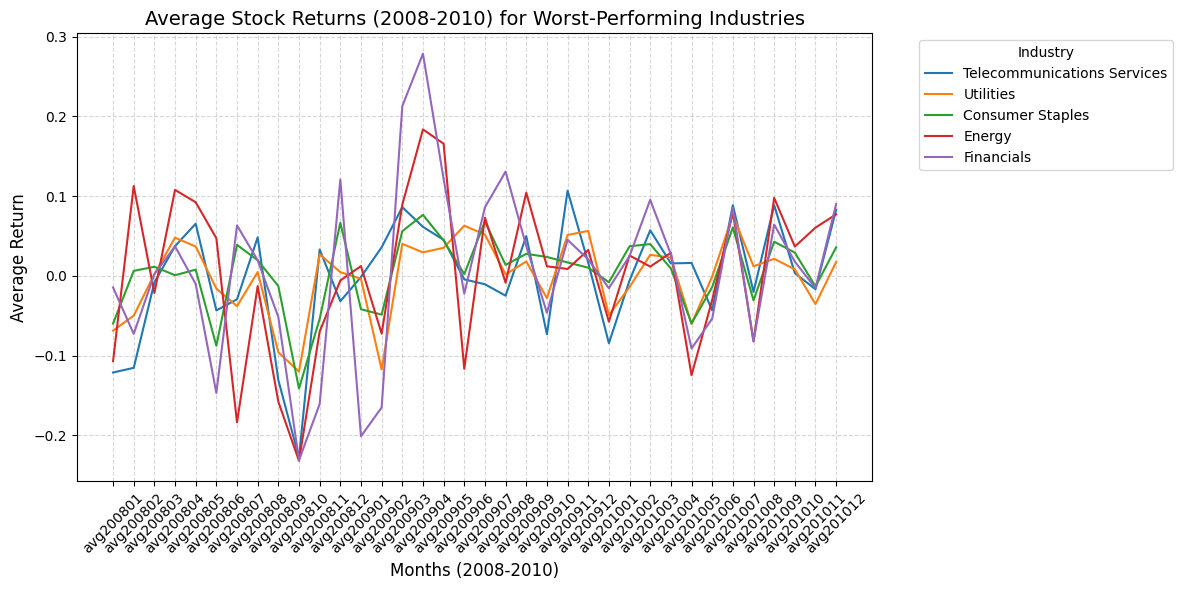

In [14]:
data = pd.read_csv("returns.csv")

# a
consumer_discretionary_count = data[data['Industry'] == 'Consumer Discretionary'].shape[0]
energy_count = data[data['Industry'] == 'Energy'].shape[0]

print(f"Number of companies in Consumer Discretionary sector: {consumer_discretionary_count}")
print(f"Number of companies in Energy sector: {energy_count}")

# b
import matplotlib.pyplot as plt

recession_months = [f'avg{year}{month:02d}' for year in range(2008, 2011) for month in range(1, 13)]

recession_mean_returns = data.groupby('Industry')[recession_months].mean()

industry_impact = recession_mean_returns.mean(axis=1)

worst_industries = industry_impact.nsmallest(5)
print("Worst-Performing Industries During the Recession:")
print(worst_industries)

worst_industries_data = recession_mean_returns.loc[worst_industries.index]

plt.figure(figsize=(12, 6))
for industry in worst_industries_data.index:
    plt.plot(worst_industries_data.columns, worst_industries_data.loc[industry], label=industry)

plt.title("Average Stock Returns (2008-2010) for Worst-Performing Industries", fontsize=14)
plt.xlabel("Months (2008-2010)", fontsize=12)
plt.ylabel("Average Return", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Industry", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**B2**

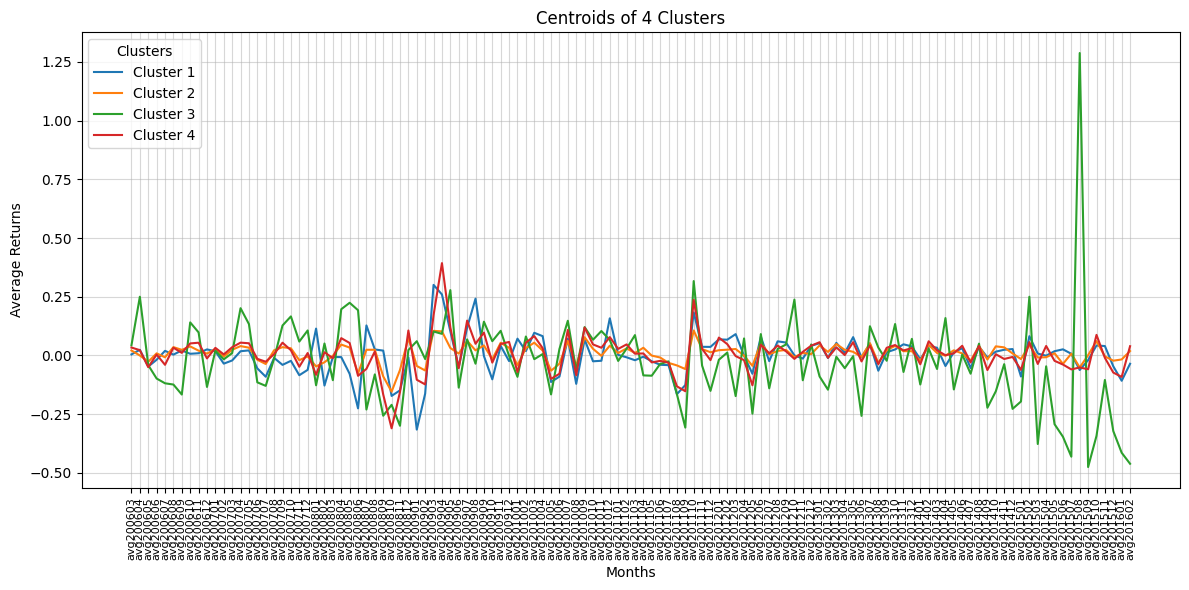

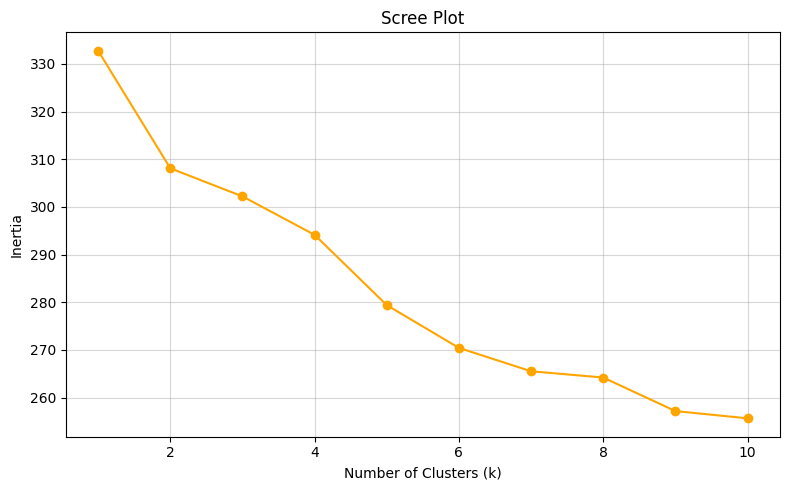


Number of Companies in Each Cluster:
Cluster_4
1    282
3    126
0     24
2      1
Name: count, dtype: int64

Number of Companies per Industry in Each Cluster:
Cluster_4  Industry                   
0          Consumer Discretionary          3
           Financials                     20
           Industrials                     1
1          Consumer Discretionary         40
           Consumer Staples               31
           Energy                          9
           Financials                     34
           Health Care                    42
           Industrials                    40
           Information Technology         37
           Materials                      17
           Telecommunications Services     5
           Utilities                      27
2          Energy                          1
3          Consumer Discretionary         26
           Consumer Staples                1
           Energy                         28
           Financials              

In [13]:
data = pd.read_csv("returns.csv")
returns_data = data.drop(columns=['symbol', 'Industry'])

# (a)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
data['Cluster_4'] = kmeans_4.fit_predict(returns_data)

centroids_4 = kmeans_4.cluster_centers_

plt.figure(figsize=(12, 6))
for i, centroid in enumerate(centroids_4):
    plt.plot(range(len(centroid)), centroid, label=f'Cluster {i+1}')
plt.title('Centroids of 4 Clusters')
plt.xlabel('Months')
plt.ylabel('Average Returns')
plt.xticks(ticks=range(len(returns_data.columns)), labels=returns_data.columns, rotation=90, fontsize=8)
plt.legend(title='Clusters')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# (b)
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(returns_data)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color='orange')
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# (c)
cluster_distribution = data['Cluster_4'].value_counts()
print("\nNumber of Companies in Each Cluster:")
print(cluster_distribution)

industry_cluster_distribution = data.groupby(['Cluster_4', 'Industry']).size()
print("\nNumber of Companies per Industry in Each Cluster:")
print(industry_cluster_distribution)

# (d)
october_2008_returns = returns_data['avg200810']
march_2009_returns = returns_data['avg200903']

worst_cluster_oct_2008 = october_2008_returns.groupby(data['Cluster_4']).mean().idxmin()
best_cluster_mar_2009 = march_2009_returns.groupby(data['Cluster_4']).mean().idxmax()

avg_return_worst_oct_2008 = october_2008_returns.groupby(data['Cluster_4']).mean()[worst_cluster_oct_2008]
avg_return_best_mar_2009 = march_2009_returns.groupby(data['Cluster_4']).mean()[best_cluster_mar_2009]

print(f"\nAverage Return for Worst Cluster in October 2008 (Cluster {worst_cluster_oct_2008}): {avg_return_worst_oct_2008}")
print(f"Average Return for Best Cluster in March 2009 (Cluster {best_cluster_mar_2009}): {avg_return_best_mar_2009}")

# (e)
cluster_descriptions = {}
for cluster in range(4):
    cluster_descriptions[cluster] = {
        'Average Returns (2008-2010)': returns_data[data['Cluster_4'] == cluster].mean().mean(),
        'Number of Companies': data[data['Cluster_4'] == cluster].shape[0]
    }

print("\nCluster Descriptions:")
for cluster, description in cluster_descriptions.items():
    print(f"Cluster {cluster}: {description}")